In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
data = pd.read_csv("fish_catch.csv")
df = pd.DataFrame(data)

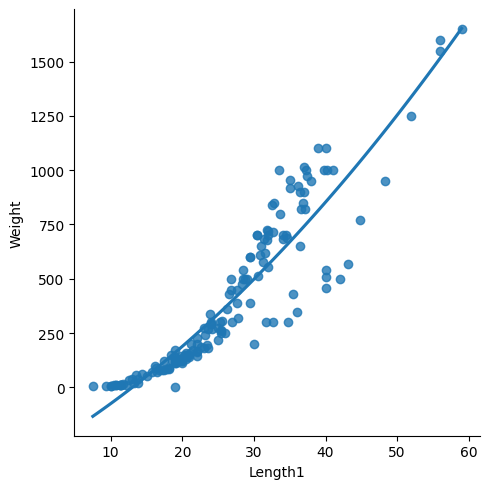

In [4]:
sns.lmplot(x ="Length1", y ="Weight", data = df, order = 2, ci = None)
plt.show()

C:\Users\Kul\AppData\Local\Temp\ipykernel_7796\906918719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<AxesSubplot: >

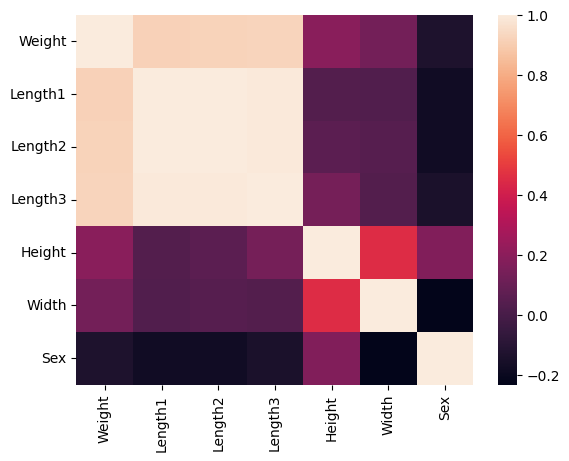

In [5]:
sns.heatmap(data=df.corr())

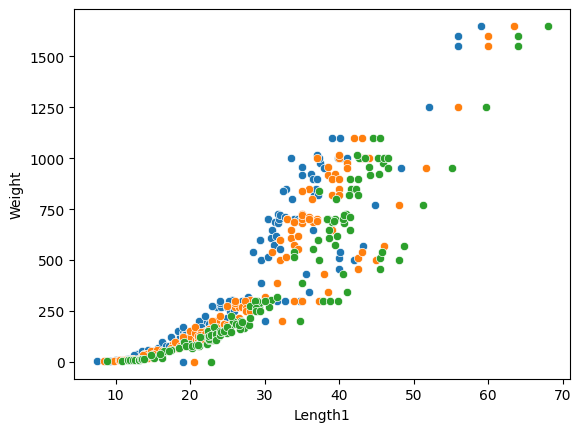

In [10]:
sns.scatterplot(data=df, x="Length1" ,y="Weight")
sns.scatterplot(data=df, x="Length2" ,y="Weight")
sns.scatterplot(data=df, x="Length3" ,y="Weight")
plt.show()

In [11]:
df.fillna(method ='ffill', inplace = True)
replacement_map = {'Lahna': 1, 'Siika': 2, 'Saerki': 3, 'Parkki': 4, 'Norssi':5, 'Hauki':6, 'Ahven':7}


In [7]:
X = np.array(df['Length1']).reshape(-1, 1)
y = np.array(df['Weight']).reshape(-1, 1)
df.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8587275583454901


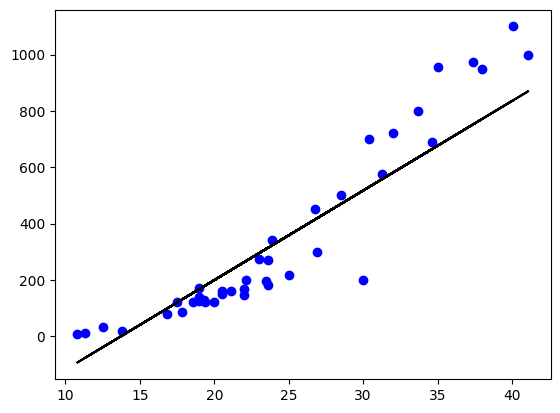

In [8]:

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import scipy.stats as stats
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print(mse)
#stats.jarque_bera(df['Length1'])
#stats.jarque_bera(df['Length2'])
#stats.jarque_bera(df['Length3'])
#stats.jarque_bera(df['Width'])
stats.jarque_bera(df['Height']+df['Width']+df['Length3']+df['Length2']+df['Length1'])


14301.953731467478


Jarque_beraResult(statistic=2.1067479847128516, pvalue=0.34875905139714203)

5.Большую и меньшую зависимость большее влияние можно заметить на хитмапе, чем ближе к 1 тем сильнее оно влияет
6.
1)
2)Дисперсия непостоянная наблюдая 1 и 3 график
3)По уравнению Хорке видим что p-значение больше 0.05 и нельзя точно утверждать что выборка имеет асимметрию и эксцесс, которые значительно отличаются от нормального распределения.
Нашел все- таки что означает regr.score в интернете. Это метод расчитывающий MAE.
Разобрался для чего использовать MSE и MAE. Нашел статью которая ставит точки над И . Так вот MSE можно использовать для визуализации производительности модели, а MAE для определения модели как она часто ошибается.(часще в анг источниках не MAE а MAD). А так можно использовать MAPE чаще всего удобнее тк видно как модель будет ошибаться в процентах.